<div style=" background-color: goldenrod;" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 10 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détectez des faux billets avec R ou Python
</h2>
</div>

In [1]:
# Importation des librairies de base
import pandas as pd   
import numpy as np   

# Visualisation des données
import matplotlib.pyplot as plt   
import seaborn as sns             

# Tests statistiques
import scipy.stats as stats
from scipy.stats import shapiro  

# Modèles statistiques
import statsmodels.api as sm      
import statsmodels.formula.api as smf   

# Tests statistiques
from statsmodels.stats.stattools import durbin_watson   
from statsmodels.stats.diagnostic import het_breuschpagan  

# Influence des observations et multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence 

# Régression linéaire et logistique
from sklearn.linear_model import LinearRegression, LogisticRegression


# Évaluation des modèles
from sklearn.metrics import (mean_squared_error, accuracy_score, precision_score, 
                             recall_score, f1_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

# Préparation des données
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler  

# Algorithme de clustering et réduction de dimension
from sklearn.cluster import KMeans  
from sklearn.decomposition import PCA   

# Sauvegarde et chargement de modèles
import joblib   

In [2]:
#Importation du fichier population.csv
billets = pd.read_csv('billets.csv', sep=';')

<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">1-Exploration des données</h1>
</div>

In [3]:
# Aperçu du Dataframe 

billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
#Composition et types de données

billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
# Statistiques descriptives

billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


OBSERVATIONS: 

- Le jeu de données contient sept colonnes,1500 individus avec des informations géométriques(mm) sur les billets en euros.

- Une variable booléen et 6 variables numerique 
  

- Notre echantillon comporte des billets authentiques et de faux billets

- Nous avons des variables géométriques incluent des mesures telles que la diagonale, les hauteurs à gauche et à droite,
  les marges supérieures et inférieures, ainsi que la longueur du billet.
    
- Ces observations initiales montrent que les données contiennent des mesures précises qui peuvent potentiellement être utilisées pour différencier les vrais des faux billets.

In [6]:
# Valeurs manquantes

Valeurs_manquantes = billets.isnull().sum()
Valeurs_manquantes

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

- On note 37 valeurs manquantes pour la variable "Marge inférieure", contre 0 pour l'ensemble des autres variables.


- Nous allons exclure temporairement les valeurs nulles pour observer les données à travers des graphiques et une matrice de corrélation.Cela permettra d'obtenir une vue d'ensemble plus claire et précise des données, sans que les valeurs manquantes n'influencent les analyses.

In [7]:
# Création du df sans valeurs manquantes

billets_clean = billets.dropna()

billets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [8]:
# Afficher le nombre de vrai et de faux
counts = billets['is_genuine'].value_counts()
counts

is_genuine
True     1000
False     500
Name: count, dtype: int64

- On note 1 000 vrais billets contre 500 faux billets.

<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">2-Visualisations et Corrélations</h1>
</div>

/Users/fatih/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


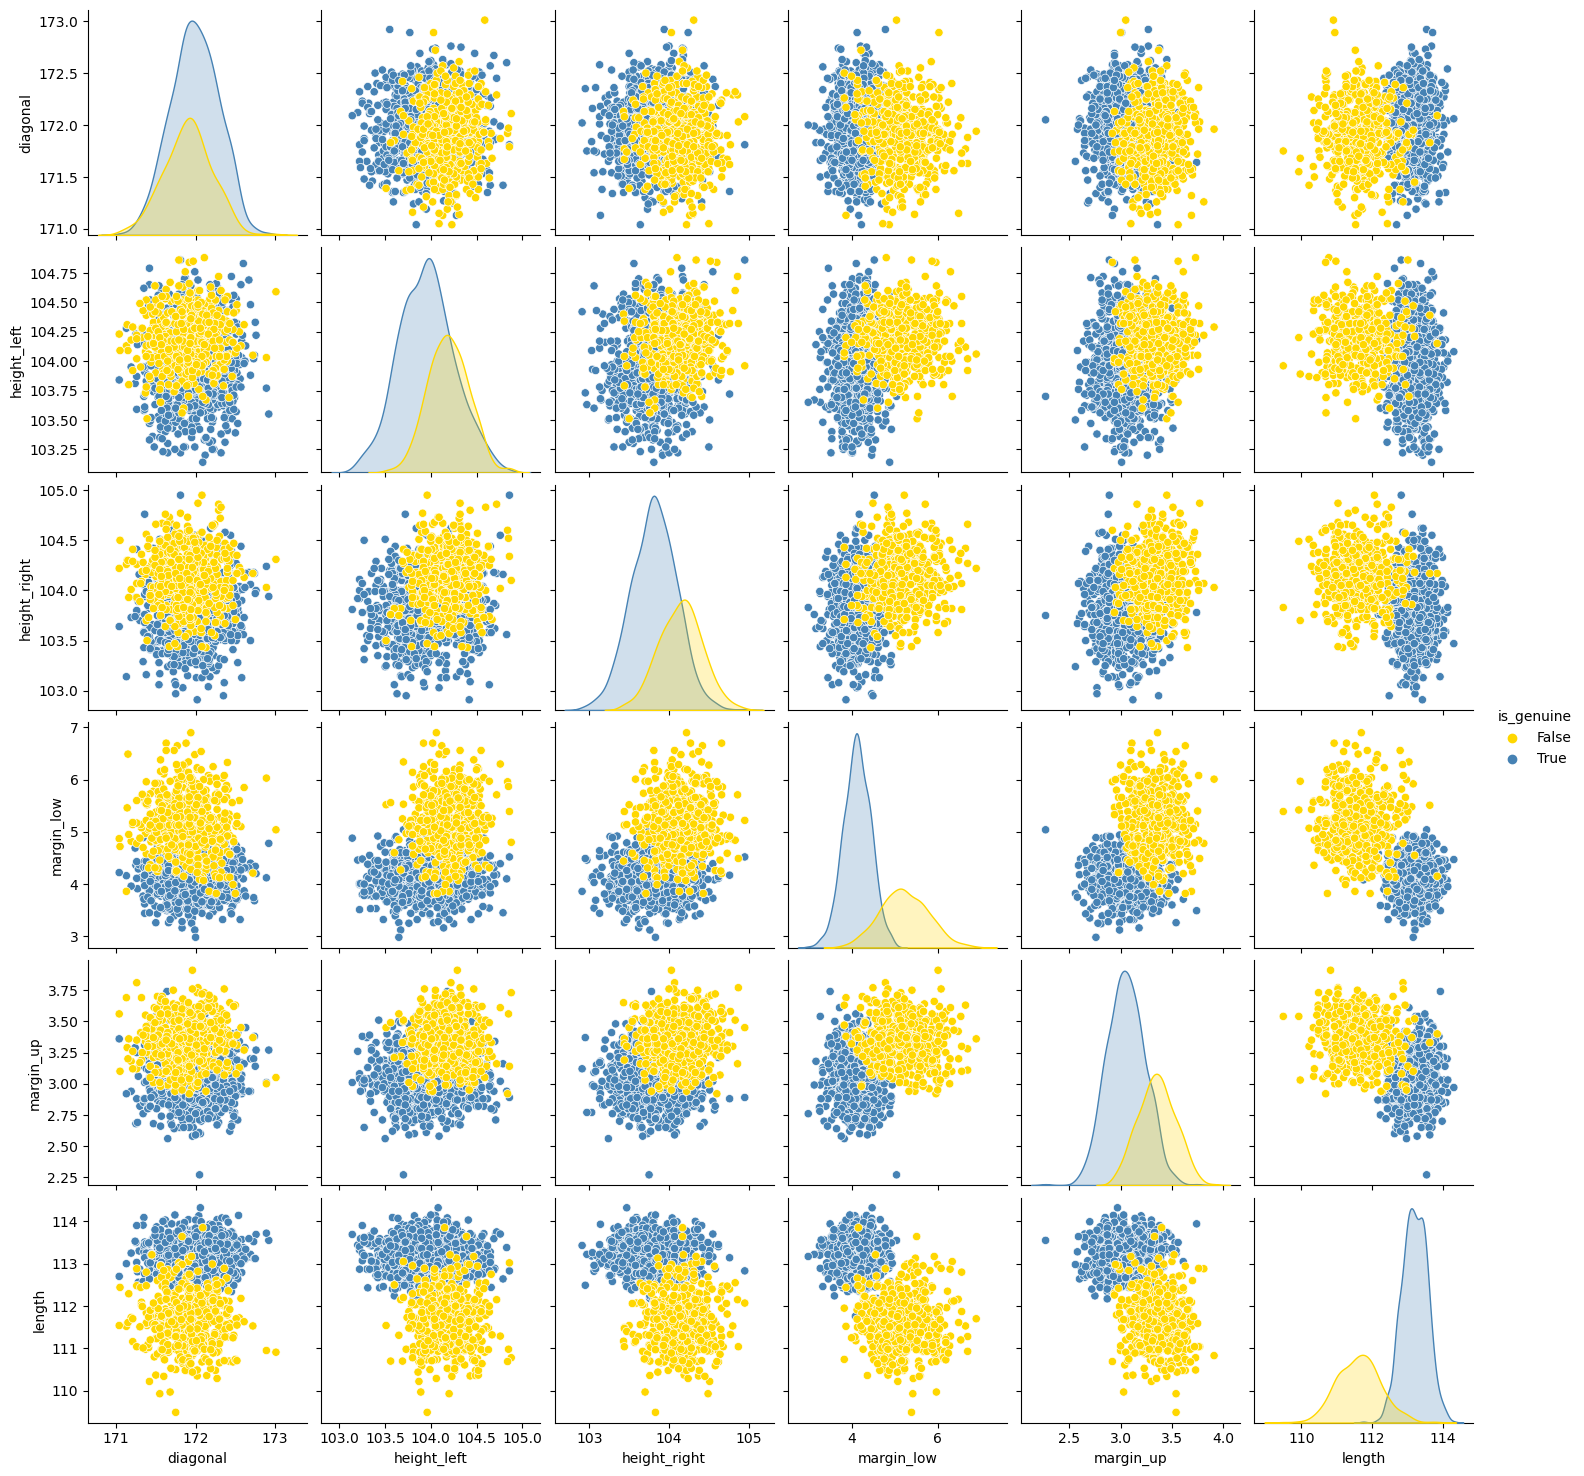

In [9]:
# Pairplot

sns.pairplot(billets_clean, hue='is_genuine', palette={False:'gold', True:'steelblue'})
plt.show()

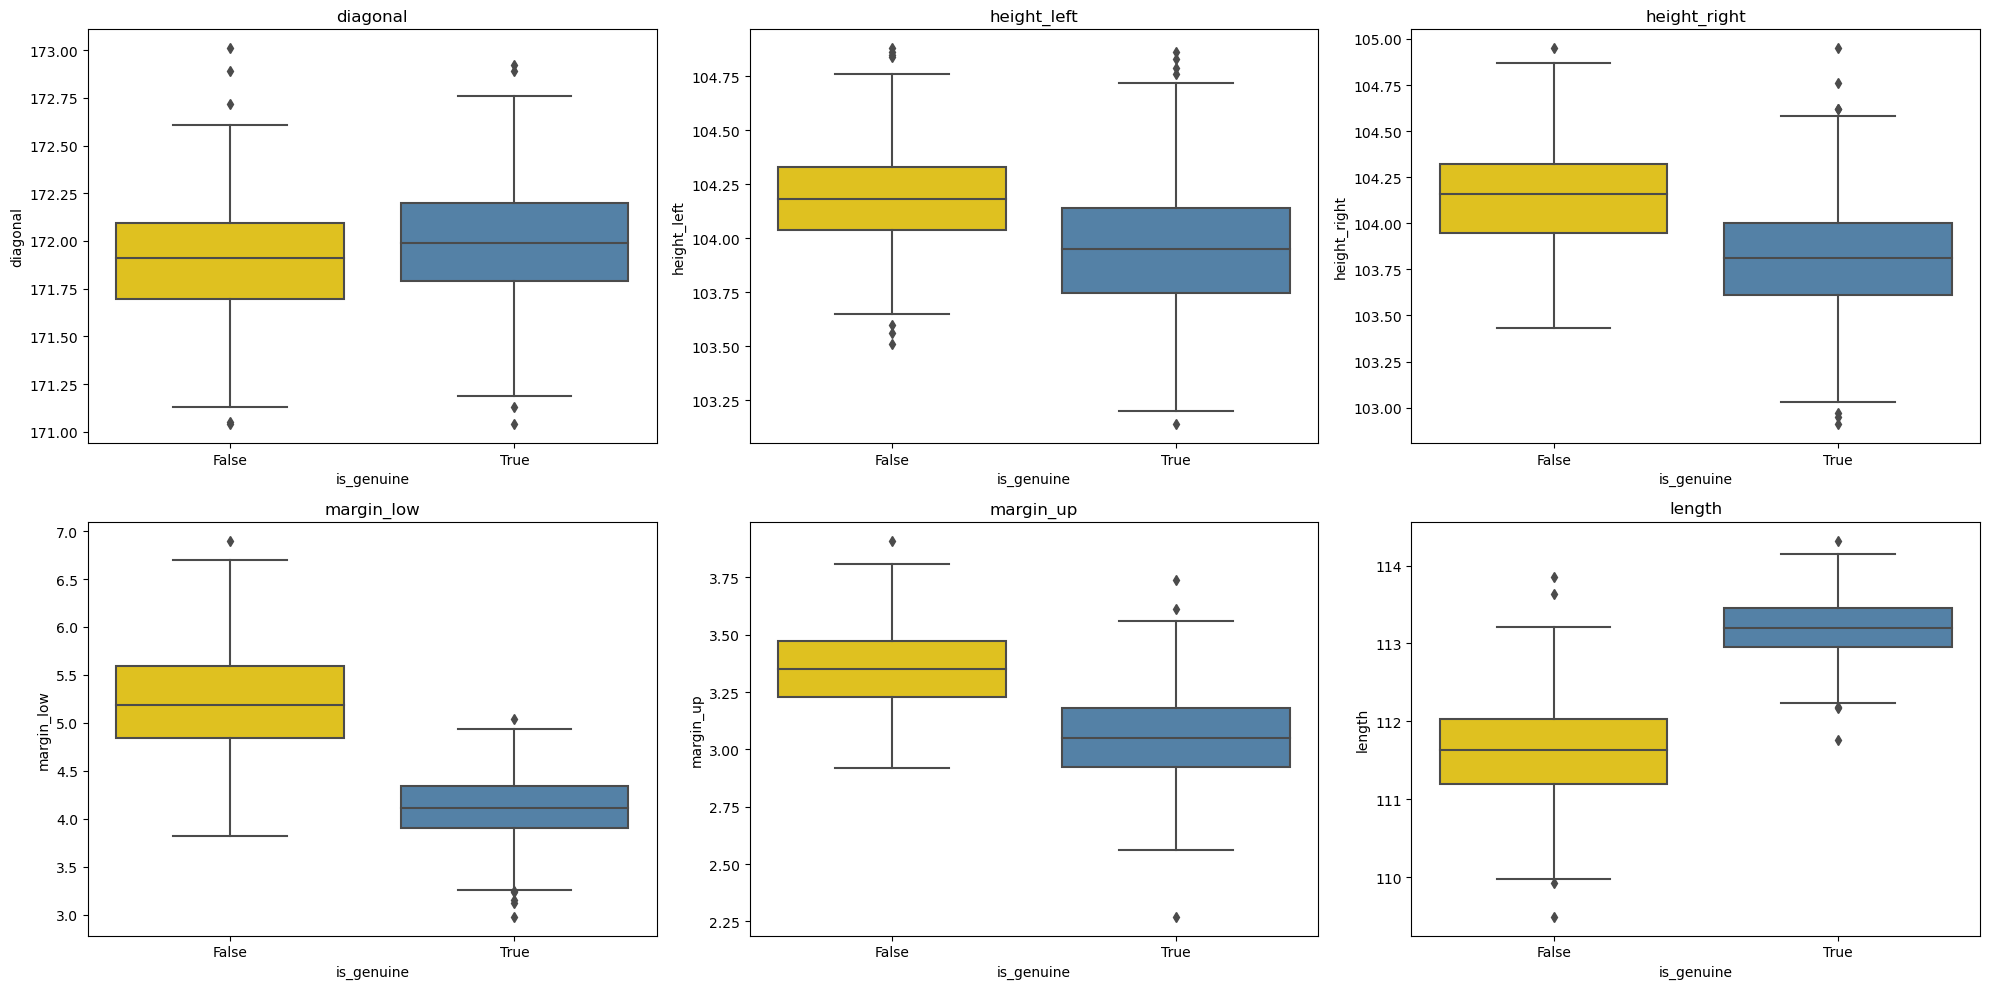

In [10]:
# Création d'un boxplot

variables = billets_clean.columns.drop('is_genuine')

fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, var in enumerate (variables):
    row, col = divmod(i,3)
    sns.boxplot(x='is_genuine',y=var, data=billets_clean, ax=axes[row, col], palette={True: 'steelblue', False: 'gold'})
    axes[row,col].set_title(f'{var}')
                            
plt.tight_layout()
plt.show()                            
                            
    


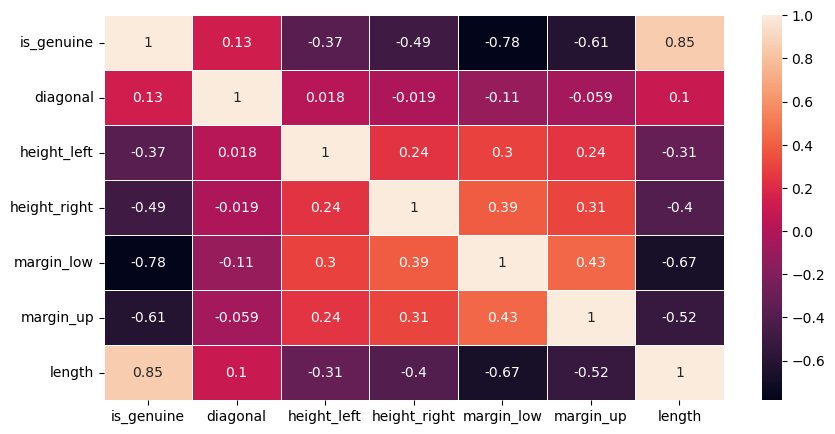

In [11]:
# Création d'une matrice de corrélation

Corr_matrix = billets_clean.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Corr_matrix, annot=True, linewidths=0.5)
plt.show()

- On note une corrélation entre la longueur et les marges inférieure et supérieure, ainsi qu'une forte corrélation entre "is_genuine" et ces trois variables.

In [12]:
# Calcul de la corrélation de Pearson entre margin_low et les autres variables
correlations = billets_clean.corr()
print(correlations['margin_low'])

is_genuine     -0.783032
diagonal       -0.111534
height_left     0.302643
height_right    0.391085
margin_low      1.000000
margin_up       0.431606
length         -0.666753
Name: margin_low, dtype: float64


In [13]:
# Régression lineaire simple

# Variables prédictives
vars = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

# Initialiser un dictionnaire pour stocker les R²
r_squared_values = {}

# Régression linéaire simple pour chaque variable prédictive
for var in vars :
    X = billets_clean[[var]].values
    y = billets_clean['margin_low'].values
    lr = LinearRegression()
    lr.fit(X, y)
    r_squared_values[var] = lr.score(X, y)

print(r_squared_values)

{'diagonal': 0.012439850430717159, 'height_left': 0.09159276027592511, 'height_right': 0.15294759201240593, 'margin_up': 0.18628380252698074, 'length': 0.4445592708293491}


- Parmi les variables disponibles, "length" présente le coefficient de détermination (R²) le plus élevé (0,4446), ce qui signifie qu'elle explique le mieux la variance de "margin_low".

<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">3-Nettoyage </h1>
</div>

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">1. Régression lineaire simple</h1>
</div>

- Commençons par appliquer une régression linéaire simple, en utilisant "length" comme seule variable prédictive. Nous analyserons ensuite les résidus pour déterminer si le modèle de régression linéaire utilisé pour la prédiction est approprié. Si les résidus montrent des motifs ou des anomalies, cela pourrait indiquer que le modèle ne capture pas bien la relation entre les variables.

In [14]:
# Variable prédictive et variable cible
X = billets_clean[['length']]
y = billets_clean['margin_low']

# Ajouter une constante à X pour inclure l'interception dans le modèle
X = sm.add_constant(X)

# Entraîner le modèle avec statsmodels
model = sm.OLS(y, X)
results = model.fit()

# Afficher le résumé du modèle
print(results.summary())

# Prédictions et résidus
y_pred = results.predict(X)
residuals = y - y_pred

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     1169.
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          8.98e-189
Time:                        12:58:46   Log-Likelihood:                -1045.8
No. Observations:                1463   AIC:                             2096.
Df Residuals:                    1461   BIC:                             2106.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.5960      1.670     36.881      0.0

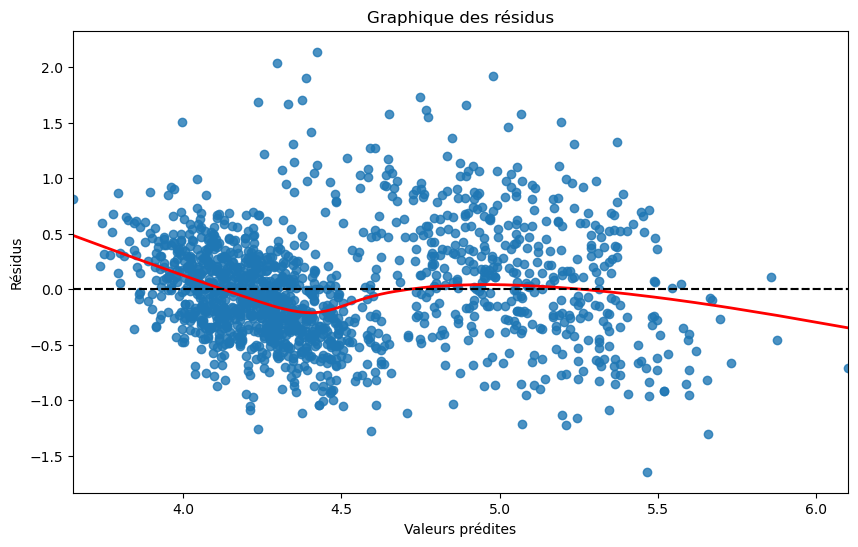

In [15]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.show()

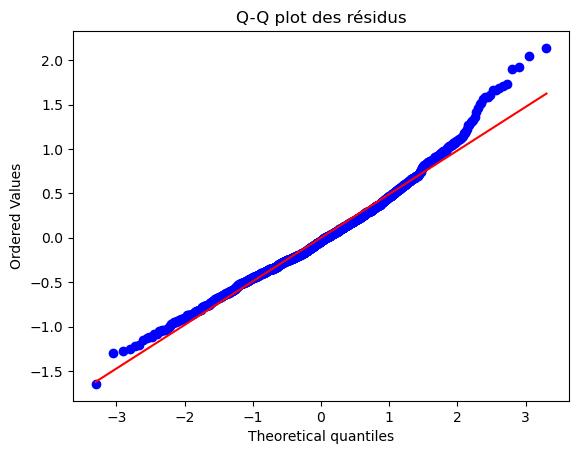

In [16]:
# Q-Q Plot pour Vérifier la Normalité

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot des résidus')
plt.show()

- Les points dévient de la ligne droite aux extrémités, ce qui indique des écarts par rapport à la normalité, suggérant que les résidus ne sont pas normalement distribués.

- Effectuons un test de Shapiro-Wilk pour confirmer cette observation.

- H0 : Les résidus suivent une distribution normale.

- H1 : Les résidus ne suivent pas une distribution normale.


In [17]:
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print('Test de Shapiro-Wilk:', shapiro_test)

Test de Shapiro-Wilk: ShapiroResult(statistic=0.9824789762496948, pvalue=2.3925759377180222e-12)


- p-value ≤ 0.05 : H0 Rejeter , ce qui signifie que les résidus ne sont pas normalement distribués.

In [18]:
# Test de Durbin-Watson pour l'Indépendance des Résidus

dw_stat = durbin_watson(residuals)
print(f'Statistique de Durbin-Watson(d): {dw_stat}')

Statistique de Durbin-Watson(d): 1.86552539795226


On obtiens un résultat d ≈ 2 ce qui indique que les résidus ont une faible autocorrélation (indépendants).

In [19]:
# Test de Breusch-Pagan pour l'homoscédasticité

# Ajouter une constante pour le modèle
X_const = sm.add_constant(X)

# Ajuster le modèle de régression
model = sm.OLS(y, X_const).fit()


bp_test = het_breuschpagan(residuals, model.model.exog)
bp_test_result = dict(zip(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], bp_test))
print('Test de Breusch-Pagan:', bp_test_result)

Test de Breusch-Pagan: {'Lagrange multiplier statistic': 60.902737258869564, 'p-value': 5.996540571018599e-15, 'f-value': 63.46128867069667, 'f p-value': 3.263713847724867e-15}


- La p-value du test de Breusch-Pagan (5,99654057106415e-15) est bien inférieure à 0,05, ce qui signifie que nous rejetons l'hypothèse nulle d'homoscédasticité.

- Les résidus présentent une hétéroscédasticité, ce qui signifie que leur variance n'est pas constante.

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">2. Régression linéaire multiple</h1>
</div>

- Appliquons maintenant une régression linéaire multiple pour vérifier si le modèle est plus fiable et robuste.

In [20]:
# Régression lineaire multiple 



# Variables prédictives et cible
X = billets_clean[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y = billets_clean['margin_low']

# Ajouter une constante pour l'interception
X_const = sm.add_constant(X)

# Ajuster le modèle de régression linéaire multiple
model = sm.OLS(y, X_const).fit(cov_type='HC3') 

# Résumé du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.32e-176
Time:                        12:58:46   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      8.847      2.599   

- R-squared : 0,477 indique que 47,7 % de la variance de "margin_low" est expliquée par les variables prédictives du modèle.

- L'AIC et le BIC sont inférieurs à ceux de la régression linéaire simple, ce qui suggère une meilleure performance du modèle.

- Durbin-Watson : 1,893 indique une faible autocorrélation des résidus.



Vérifions les différentes conditions de notre régression linéaire multiple :

- Absence ou faible multicolinéarité
- Homoscédasticité des résidus
- Normalité des résidus
- Absence ou faible corrélation des résidus
    

In [21]:
# Calcul du VIF pour chaque variable prédictive
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

        feature            VIF
0      diagonal  170566.670778
1   height_left  111895.309916
2  height_right  100858.864433
3     margin_up     261.969190
4        length   22708.222743


- Les valeurs VIF sont très élevées, ce qui indique une forte multicolinéarité.

In [22]:
# Ajustez votre modèle de régression linéaire multiple

y = billets_clean['margin_low']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.32e-176
Time:                        12:58:46   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      8.847      2.599   

In [23]:
# variables indépendantes utilisées dans le modèle
variables = model.model.exog

# Calcul du VIF après ajustement du modèle
vif_data_post = pd.DataFrame()
vif_data_post["feature"] = X.columns
vif_data_post["VIF"] = [variance_inflation_factor(variables, i) for i in range(1, variables.shape[1])]
print("Post-regression VIF:\n", vif_data_post)


Post-regression VIF:
         feature       VIF
0      diagonal  1.013613
1   height_left  1.138261
2  height_right  1.230115
3     margin_up  1.404404
4        length  1.576950


In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.32e-176
Time:                        12:58:46   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      8.847      2.599   

- Avec un VIF < 5, nous avons résolu notre problème de multicolinéarité. Les VIF post-régression sont tous proches de 1, indiquant une faible corrélation entre les variables indépendantes, ce qui améliore la stabilité du modèle de régression.

In [25]:
# Calcul des valeurs prédites et des résidus
y_pred = model.predict(X_const)
residuals2 = y - y_pred

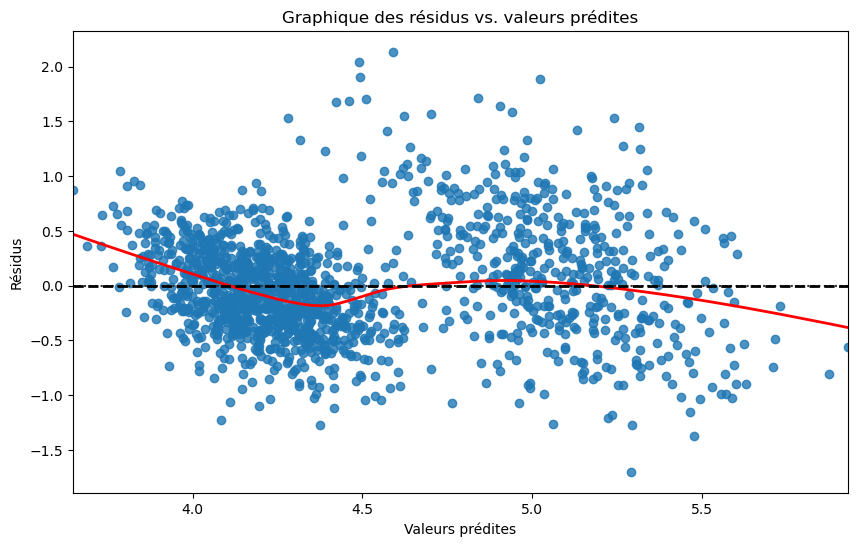

In [26]:
#Linéarité

# Tracer les résidus en fonction des valeurs prédites
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus vs. valeurs prédites')
plt.axhline(0, color='black', linestyle='--', lw=2)
plt.show()

In [27]:
# Homoscedasticité

bp_test = het_breuschpagan(residuals, X_const)
print(f"Breusch-Pagan test statistic: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")

Breusch-Pagan test statistic: 76.25796610718201
p-value: 5.081713641488224e-15


- Le graphique suggère que le modèle linéaire pourrait ne pas capturer parfaitement toutes les relations dans les données, notamment une légère non-linéarité. Cependant, l'homoscédasticité semble être relativement bien respectée, même si elle pourrait ne pas être parfaite.

- La p-value < 0,05 signifie que l'hypothèse nulle d'homoscédasticité est rejetée, c'est-à-dire que la variance des résidus n'est pas constante pour toutes les valeurs prédites.

Test de Shapiro-Wilk : Statistique = 0.9824789762496948, p-value = 2.3925759377180222e-12


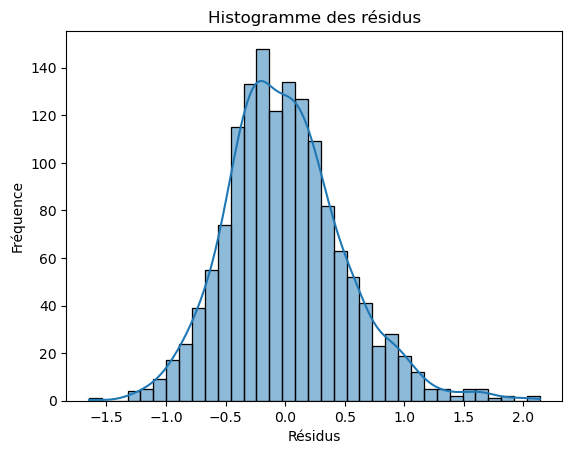

In [28]:
# Normalité

# Test de Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f"Test de Shapiro-Wilk : Statistique = {stat}, p-value = {p_value}")

# Histogramme avec la courbe de distribution normale
sns.histplot(residuals, kde=True)
plt.title("Histogramme des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()


- Bien que l'histogramme ait montré une distribution visuellement proche de la normalité, le test de Shapiro-Wilk indique que les résidus ne sont pas exactement normaux. 
- Cependant, pour de grands échantillons, même de petites déviations de la normalité peuvent conduire à un rejet de l'hypothèse nulle.

In [29]:
# Séparer les lignes avec et sans valeurs manquantes

missing = billets[billets['margin_low'].isnull()]
complete = billets.dropna(subset=['margin_low'])

# Modèle de régression linéaire multiple avec les données complètes

X_complete = complete[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y_complete = complete['margin_low']
model = LinearRegression().fit(X_complete, y_complete)

# Prédiction des valeurs manquantes

X_missing = missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
predicted_values = model.predict(X_missing)

# Imputation des valeurs manquantes
billets.loc[billets['margin_low'].isnull(), 'margin_low'] = predicted_values

# Vérification des valeurs imputées
print(billets.isnull().sum())

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


In [30]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- Nos valeurs manquantes ont bien été remplacées par nos prédictions .

<div style="background-color: #F7DED0; color: black; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 18px;">3. Outliers </h1>
</div>

In [31]:
# Fonction pour identifier et remplacer les valeurs aberrantes
def replace_outliers(df):
    scale = 1.5
    outlier_bounds = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - scale * IQR
        upper_bound = Q3 + scale * IQR
        
        outlier_bounds[col] = (lower_bound, upper_bound)  # Stocker les bornes
        
        median = df[col].median()
        
        # Remplacer les valeurs aberrantes par la médiane
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    
    return df, outlier_bounds

# Remplacer les valeurs aberrantes dans le DataFrame original
billets, outlier_bounds = replace_outliers(billets)

# Afficher les premières lignes pour vérifier
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.04,103.92,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


- La combinaison de l'IQR pour détecter les outliers et la médiane pour les remplacer est robuste. La médiane n'est pas affectée par les valeurs extrêmes.

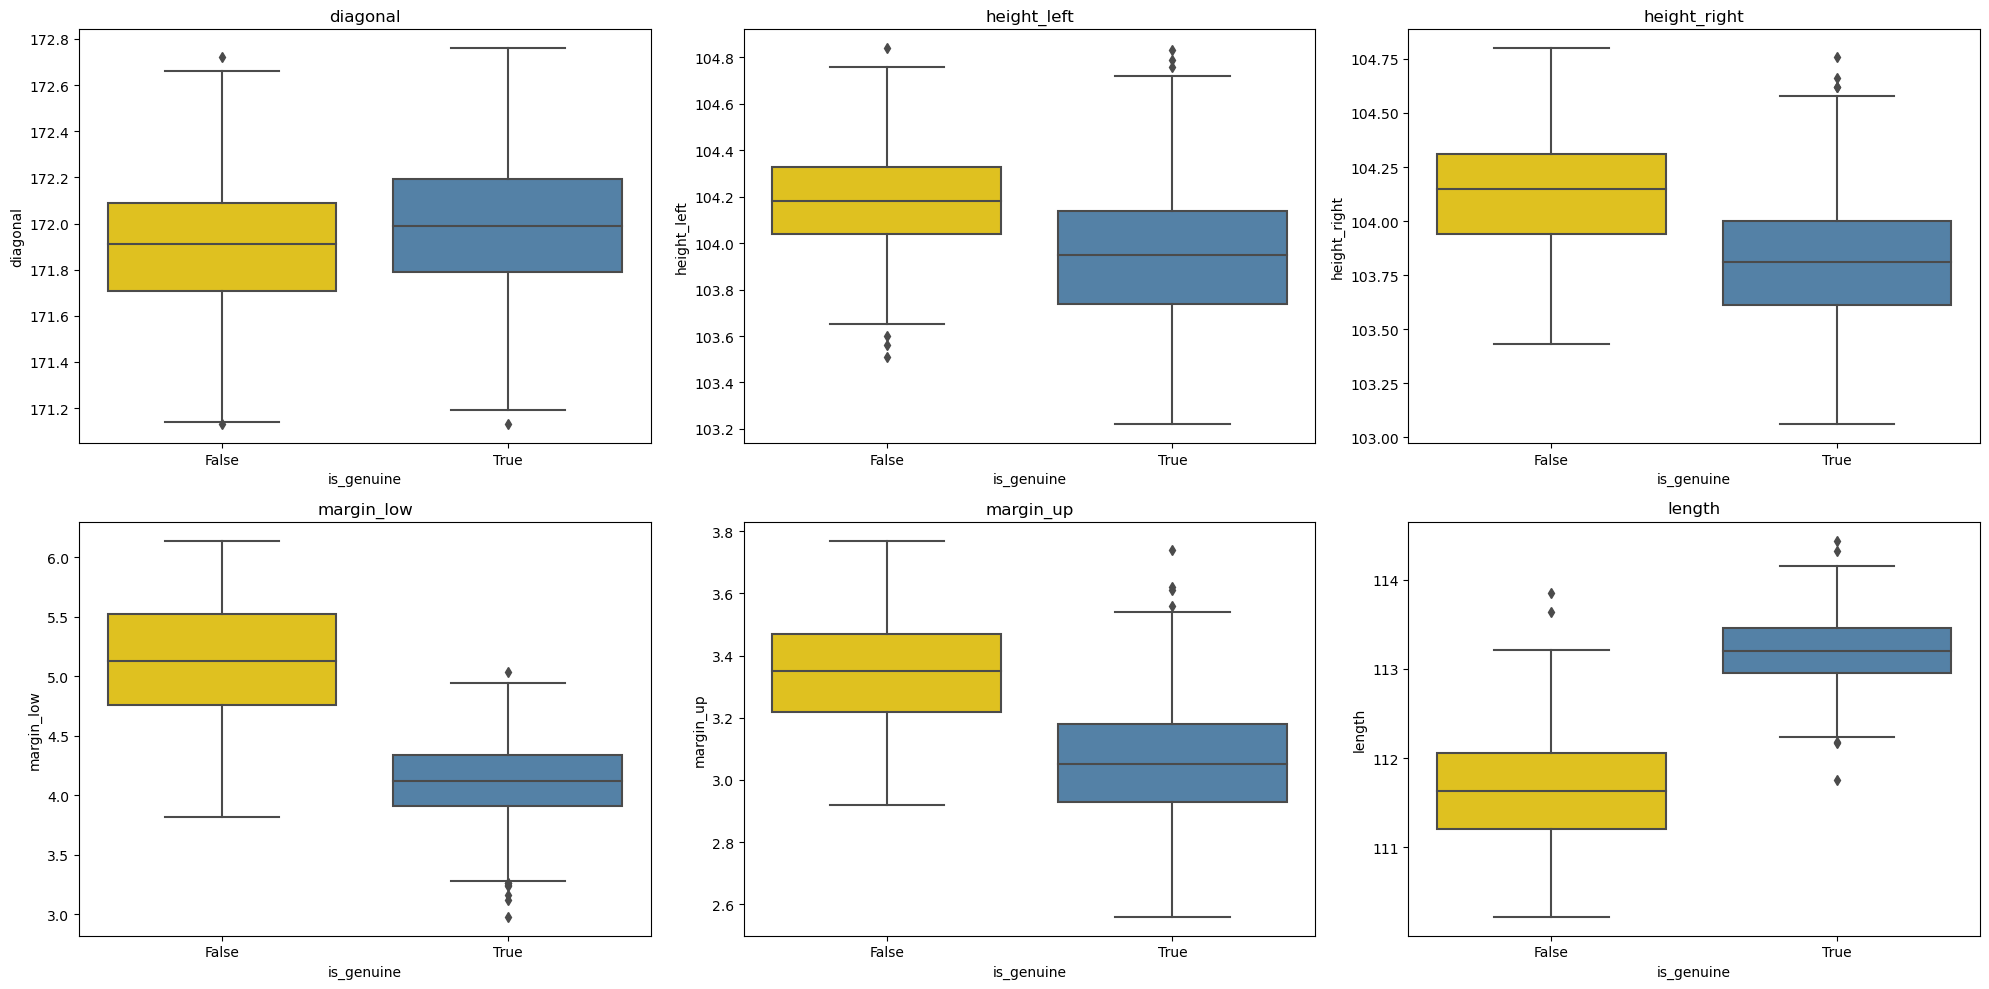

In [32]:
# Création d'un boxplot

variables = billets.columns.drop('is_genuine')

fig, axes = plt.subplots(2,3, figsize=(20,10))

for i, var in enumerate (variables):
    row, col = divmod(i,3)
    sns.boxplot(x='is_genuine',y=var, data=billets, ax=axes[row, col], palette={True: 'steelblue', False: 'gold'})
    axes[row,col].set_title(f'{var}')
                            
plt.tight_layout()
plt.show()

<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">4- Normalisation </h1>
</div>

In [33]:
# Normaliser les données
scaler = StandardScaler()
billets_norm = scaler.fit_transform(billets)

# Convertir en DataFrame
bnormal = pd.DataFrame(billets_norm, columns=billets.columns)

# Afficher les premières lignes pour vérifier
bnormal.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.707107,-0.495359,0.039038,-0.002966,0.113815,-1.139386,0.168243
1,0.707107,-1.669249,-2.269297,-0.829116,-1.109976,-0.702996,0.469559
2,0.707107,2.456135,1.532667,-1.337515,-0.081992,-0.921191,0.550682
3,0.707107,-2.004646,-0.402261,0.060584,-1.354735,-0.615718,0.956300
4,0.707107,-0.763677,0.853745,-1.464615,-0.669412,1.435317,-0.167841


<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">5- PCA </h1>
</div>

In [34]:
# Créer une PCA à 2 composantes
pca = PCA(n_components=2) 

# Ajuster PCA aux données normalisées
pca_result = pca.fit_transform(bnormal)

# Convertir le résultat en DataFrame pour plus de clarté
pcadf = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Afficher les premières lignes pour vérifier
pcadf.head()

# Afficher la variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale : ", explained_variance)

Variance expliquée par chaque composante principale :  [0.48809505 0.14575856]


Les deux composante principale captent un peu près 62% de la variance de notre échantillon.

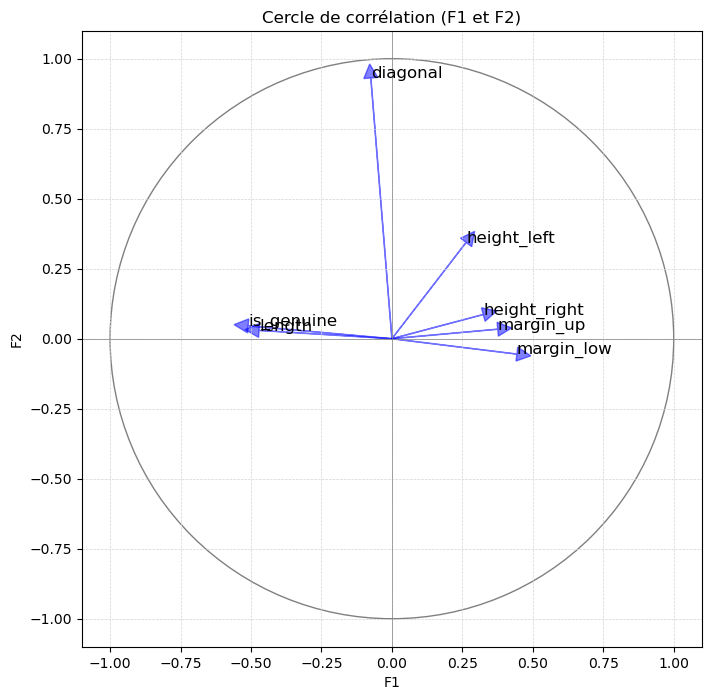

In [35]:
# Fonction pour afficher le cercle de corrélation
def display_correlation_circle(pca, component_1, component_2, feature_names):
    plt.figure(figsize=(8, 8))
    
    # Dessiner le cercle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)
    
    # Récupérer les composantes principales
    components = pca.components_
    
    # Tracer chaque flèche représentant les variables d'origine
    for i, (comp1, comp2) in enumerate(zip(components[component_1, :], components[component_2, :])):
        plt.arrow(0, 0, comp1, comp2, color='blue', alpha=0.5, head_width=0.05, head_length=0.05)
        plt.text(comp1, comp2, feature_names[i], fontsize=12)
    
    # Paramètres des axes
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel(f"F{component_1 + 1}")
    plt.ylabel(f"F{component_2 + 1}")
    plt.title(f"Cercle de corrélation (F{component_1 + 1} et F{component_2 + 1})")
    plt.axhline(0, color='grey', lw=0.5)
    plt.axvline(0, color='grey', lw=0.5)
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)
    plt.show()

# Noms des variables réels
feature_names = bnormal.columns

# Afficher le cercle de corrélation pour les composantes principales F1 et F2
display_correlation_circle(pca, 0, 1, feature_names)

 Les variables les plus correlées positivement à F1 sont :

- Margin low
- margin up
- height right
 
 Les variables les plus correlées négativement F2 sont :
- Length


 
 Les variables les plus correlées positivement à F2 sont : 

- diagonal
 


 <div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">6- K-Means </h1>
</div>

/Users/fatih/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fatih/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fatih/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fatih/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

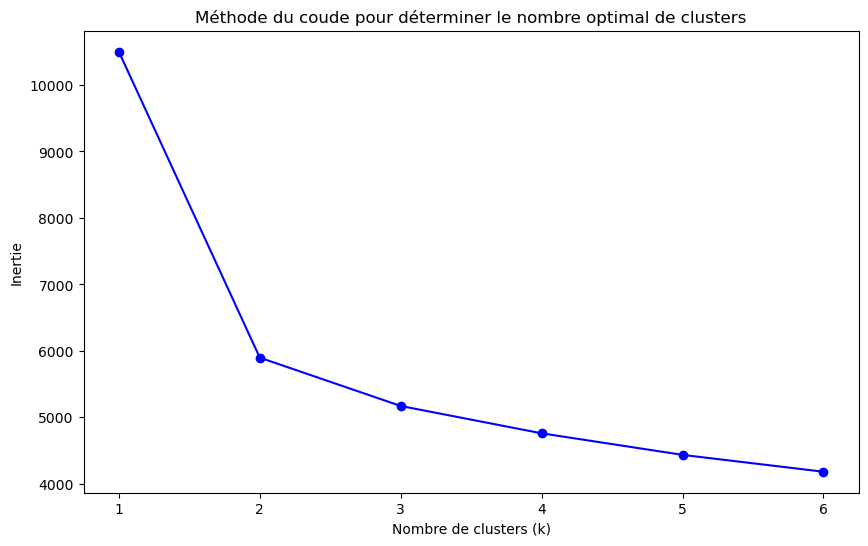

In [36]:
# Calculer l'inertie pour chaque nombre de clusters
inertia = [KMeans(n_clusters=k, random_state=42).fit(bnormal).inertia_ for k in range(1, 7)]

# Tracer la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), inertia, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

In [37]:
billets2 = billets.copy()


In [38]:
# Nombre optimal de clusters 
optimal_k = 2

# Effectuer le K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
billets2['Cluster'] = kmeans.fit_predict(bnormal)

# Afficher les premières lignes pour vérifier les clusters attribués
billets2.head(10)


/Users/fatih/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,Cluster
0,True,171.81,104.04,103.92,4.52,2.89,112.83,0
1,True,171.46,103.36,103.66,3.77,2.99,113.09,0
2,True,172.69,104.48,103.50,4.40,2.94,113.16,0
3,True,171.36,103.91,103.94,3.62,3.01,113.51,0
4,True,171.73,104.28,103.46,4.04,3.48,112.54,0
5,True,172.17,103.74,104.08,4.42,2.95,112.81,0
6,True,172.34,104.18,103.85,4.58,3.26,112.81,0
7,True,171.88,103.76,104.08,3.98,2.92,113.08,0
8,True,172.47,103.92,103.67,4.00,3.25,112.85,0
9,True,172.47,104.07,104.02,4.04,3.25,113.45,0


In [39]:
# Afficher le nombre de points dans chaque cluster
cluster_counts = billets2['Cluster'].value_counts()
cluster_counts

Cluster
0    1002
1     498
Name: count, dtype: int64

- On remarque une répartition très légèrement différente par rapport à la répartition initiale.

In [40]:
# Afficher la composition de chaque cluster
for cluster_id in set(billets2['Cluster']):
    print(f"Cluster {cluster_id}: ", end="")
    
    # Extraire les valeurs de la colonne 'is_genuine' pour le cluster actuel
    is_genuine_list = billets2[billets2['Cluster'] == cluster_id]['is_genuine'].tolist()
    
    # Afficher les valeurs sous forme de liste séparée par des virgules
    print(", ".join(map(str, is_genuine_list)))

Cluster 0: True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True,

/Users/fatih/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


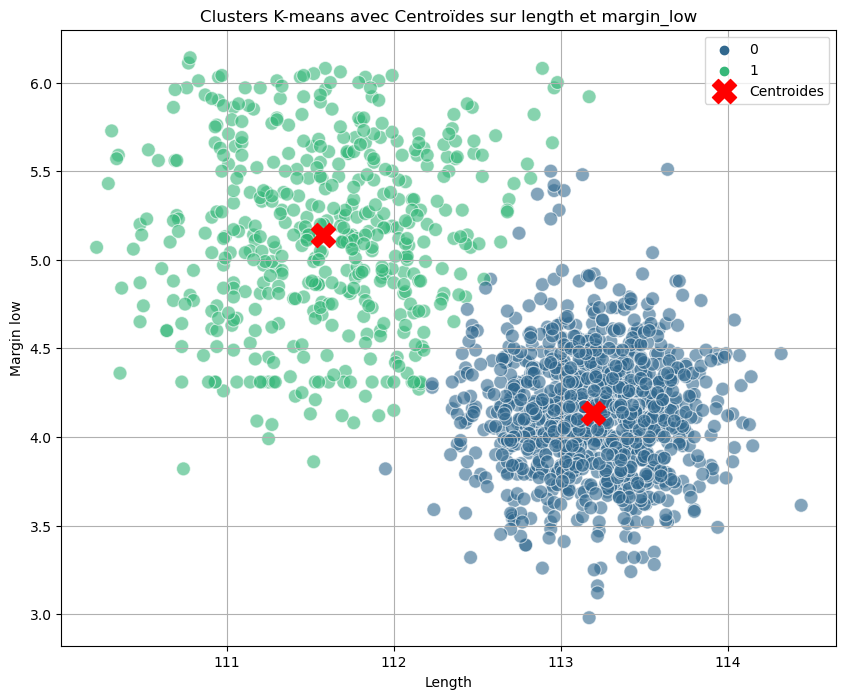

In [41]:
# Extraire les deux variables d'intérêt
X = billets2[['length', 'margin_low']]

# Nombre optimal de clusters
optimal_k = 2

# Effectuer le K-means avec le nombre optimal de clusters sur les variables 'length' et 'margin_up'
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)

# Visualiser les clusters et les centroïdes
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X['length'], y=X['margin_low'], hue=clusters, palette='viridis', s=100, alpha=0.6)

# Ajouter les centroïdes au graphique
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')

# Ajouter les labels et le titre
plt.title('Clusters K-means avec Centroïdes sur length et margin_low')
plt.xlabel('Length')
plt.ylabel('Margin low')
plt.legend()
plt.grid(True)
plt.show()

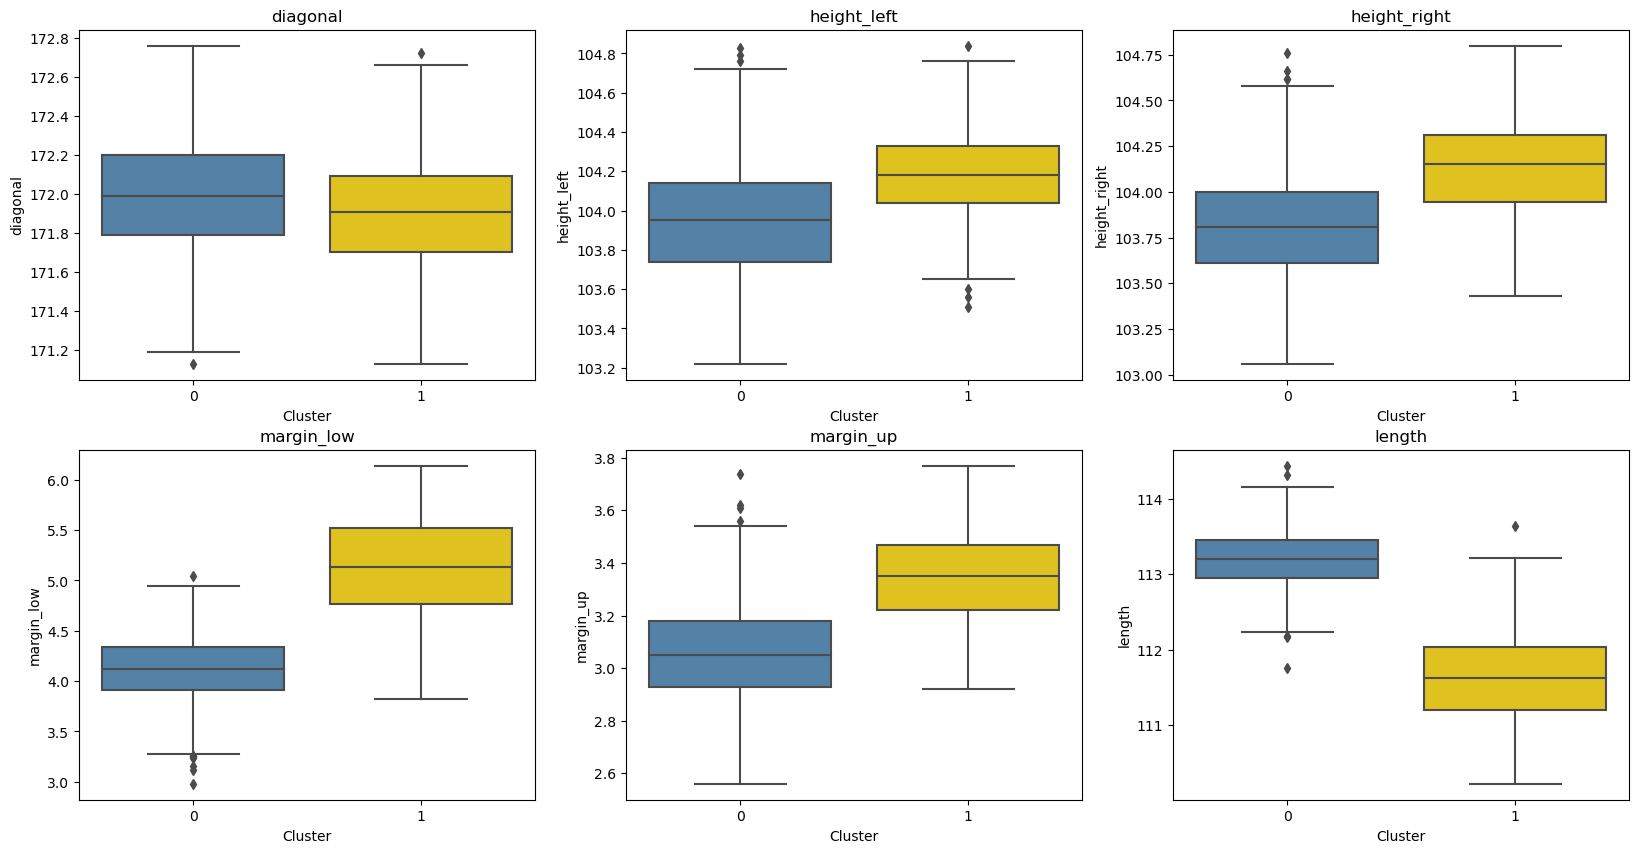

In [43]:
# Sélection des variables numériques
numeric_cols = billets2.select_dtypes(include=[np.number]).columns.drop('Cluster')

# Calculer le nombre de lignes et de colonnes nécessaires
num_vars = len(numeric_cols)
n_cols = 3
n_rows = (num_vars + n_cols - 1) // n_cols  

# Créer les subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Aplatir les axes si nécessaire pour itération
axes = axes.flatten()

for i, var in enumerate(numeric_cols):
    sns.boxplot(x='Cluster', y=var, data=billets2, ax=axes[i], palette={0: 'steelblue', 1: 'gold'})
    axes[i].set_title(f'{var}')

# Cacher les axes vides
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

- On remarque que les billets appartenant au cluster 1 ont une marge inférieure et supérieure plus importante que ceux du cluster 0, ainsi qu'une longueur plus petite.

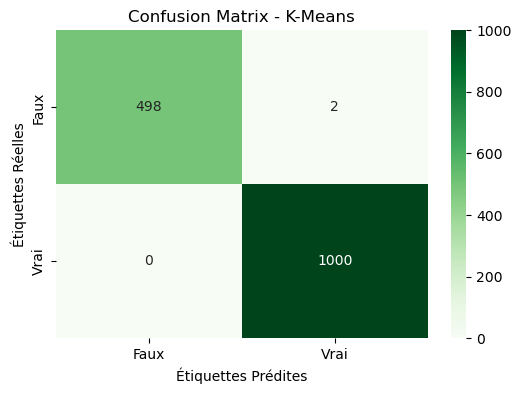

Confusion Matrix:
 [[ 498    2]
 [   0 1000]]
Accuracy: 0.9986666666666667
Classification Report:
               precision    recall  f1-score   support

        Faux       1.00      1.00      1.00       500
        Vrai       1.00      1.00      1.00      1000

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [44]:
# Définir la variable y_true
y_true = billets2['is_genuine']

# Ajuster les clusters pour correspondre aux étiquettes réelles
adjusted_predictions = np.where(billets2['Cluster'] == 0, 1, 0)

# Création de la matrice de confusion
conf_matrix = confusion_matrix(y_true, adjusted_predictions)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Faux', 'Vrai'], yticklabels=['Faux', 'Vrai'])
plt.title('Confusion Matrix - K-Means')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.show()

# Affichage de la matrice de confusion
print("Confusion Matrix:\n", conf_matrix)

# Calcul et affichage de l'accuracy
accuracy = accuracy_score(y_true, adjusted_predictions)
print("Accuracy:", accuracy)

# Génération et affichage du rapport de classification
class_report = classification_report(y_true, adjusted_predictions, target_names=['Faux', 'Vrai'])
print("Classification Report:\n", class_report)

<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">7- Régression Logistique </h1>
</div>

In [45]:
bnormal["is_genuine"] = bnormal["is_genuine"].astype(int)

In [46]:
bnormal["is_genuine"] = bnormal["is_genuine"].apply(lambda x: 1 if x == 0 else 0)

Accuracy: 0.9933333333333333
Confusion Matrix:
 [[ 96   1]
 [  1 202]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        97
           1       1.00      1.00      1.00       203

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



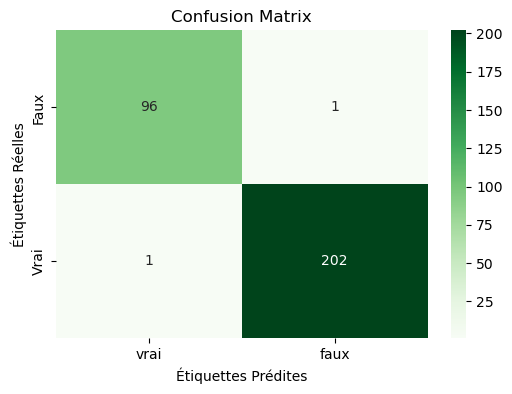

In [47]:
# Régression logistique

# Définir les variables indépendantes et la variable cible
X = bnormal.drop(columns=['is_genuine'])
y = bnormal['is_genuine']

#  Ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajuster le modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prédictionsm
y_pred = log_reg.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['vrai', 'faux'], yticklabels=['Faux', 'Vrai'])
plt.title('Confusion Matrix')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Étiquettes Réelles')
plt.show()



- Seulement 2 erreurs sur 300 prédictions, ce qui montre que notre modèle est très précis..

- Le modèle a une précision globale de 99,3% 

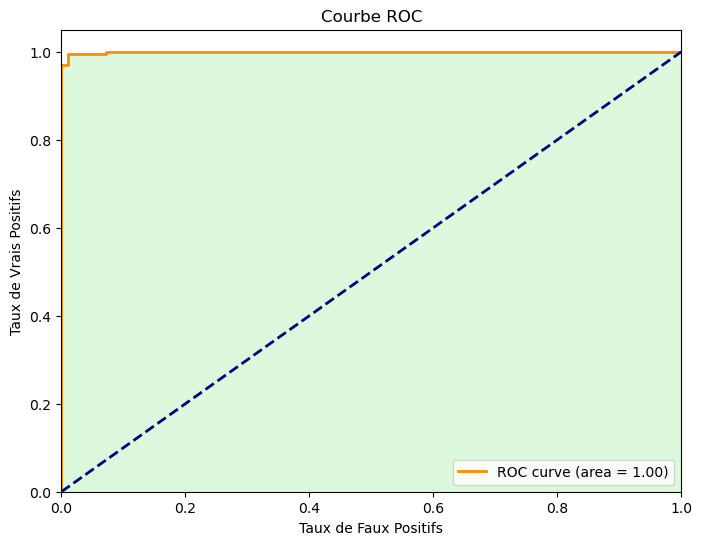

In [49]:
# Prédictions pour la classe des vrais billets
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC 
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.fill_between(fpr, tpr, color='lightgreen', alpha=0.3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

- L'AUC  d'une courbe ROC représente la performance globale d'un modèle de classification binaire.
   Elle est généralement comprise entre 0 et 1, où 1 indique un modèle parfait, et 0.5 indique un modèle qui ne fait pas mieux que le hasard.

In [50]:
print(y_train.unique())

[1 0]


In [51]:
# sauvegarde du modèle 

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  
joblib.dump(log_reg, 'detecteur.joblib')

['detecteur.joblib']

- On sauvegarde le modèle pour pouvoir le réutiliser sur d'autres échantillons.

<div style="background-color: darkseagreen; color: Dark; padding: 10px; border-radius: 5px;">
  <h1 style="font-size: 22px;">8- Test 1 nouveau jeu de données </h1>
</div>

In [52]:
# Importer le fichier 
new_billets = pd.read_csv('billets_production.csv')
new_billets


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [53]:
new_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 412.0+ bytes


In [54]:
# Normaliser les données

scaler = StandardScaler()
new_feature = new_billets.drop(columns=['id'])
new_norm = scaler.fit_transform(new_feature)
new_norm2 = pd.DataFrame(new_norm, columns=new_feature.columns)
new_norm2

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104


In [55]:
# charger le model 
with open('/Users/fatih/Desktop/Projet 10/detecteur.joblib', 'rb') as file:

     detecteur = joblib.load(file)


# Effectuer la prédictions

prédiction = detecteur.predict(new_norm2)

# Ajouter les prédictions au dataframe 

new_billets['is_genuine_pred'] = prédiction


new_billets

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine_pred
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1


- Les trois premiers billets sont faux et les deux derniers sont vrais d'après notre modèle.

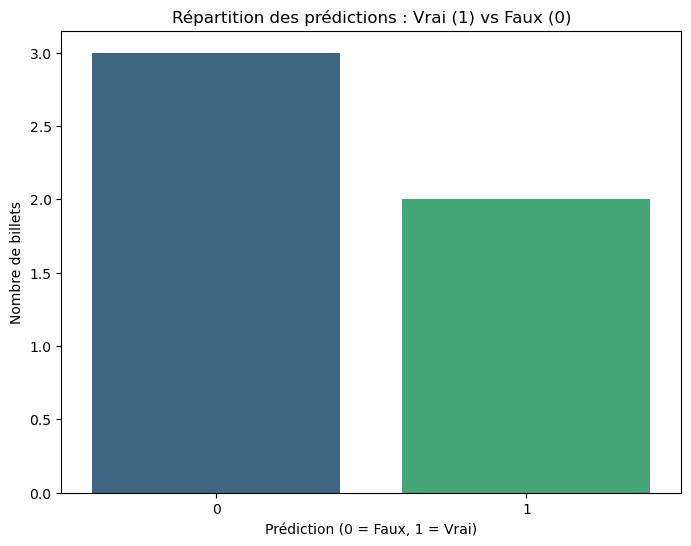

In [56]:
# Visualiser les prédictions
plt.figure(figsize=(8, 6))
sns.countplot(x='is_genuine_pred', data=new_billets, palette='viridis')
plt.title("Répartition des prédictions : Vrai (1) vs Faux (0)")
plt.xlabel("Prédiction (0 = Faux, 1 = Vrai)")
plt.ylabel("Nombre de billets")
plt.show()

In [57]:
def analyser_billets(file_path):
    # Importer le fichier
    new_billets = pd.read_csv(file_path)
    
    # Afficher le DataFrame 
    print("DataFrame :")
    display(new_billets)
    
    # infos sur le DataFrame
    print(new_billets.info())
    
    # Normalisation
    scaler = StandardScaler()
    new_feature = new_billets.drop(columns=['id'])
    new_norm = scaler.fit_transform(new_feature)
    new_norm2 = pd.DataFrame(new_norm, columns=new_feature.columns)
    
    # Afficher le DataFrame normalisé
    print("\nDataFrame normalisé :")
    display(new_norm2)
    
    # Charger le modèle
    with open('/Users/fatih/Desktop/Projet 10/detecteur.joblib', 'rb') as file:
        detecteur = joblib.load(file)
    
    # Effectuer les prédictions
    prédiction = detecteur.predict(new_norm2)
    
    # Ajouter les prédictions au DataFrame
    new_billets['is_genuine_pred'] = prédiction
    
    # Afficher le DataFrame avec les prédictions
    print("\nDataFrame avec les prédictions :")
    display(new_billets)
    
    # Visualiser la répartition des vrais(1) et faux(0) billets
    plt.figure(figsize=(8, 6))
    sns.countplot(x='is_genuine_pred', data=new_billets, palette='viridis')
    plt.title("Répartition des prédictions : Vrai (1) vs Faux (0)")
    plt.xlabel("Prédiction (0 = Faux, 1 = Vrai)")
    plt.ylabel("Nombre de billets")
    plt.show()
    
    return new_billets, new_norm2

DataFrame :


,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 412.0+ bytes
None

DataFrame normalisé :


,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.664228,-0.502224,-1.228900,0.438224,0.485681,-1.124014
1,-0.287604,-0.050787,0.449459,1.493702,0.564017,-0.289103
2,0.157497,1.106022,0.904607,0.144293,1.190702,-0.937094
3,1.835186,1.021377,1.046841,-0.590533,-1.629382,1.094107
4,-1.040852,-1.574388,-1.172007,-1.485686,-0.611018,1.256104



DataFrame avec les prédictions :


,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine_pred
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1


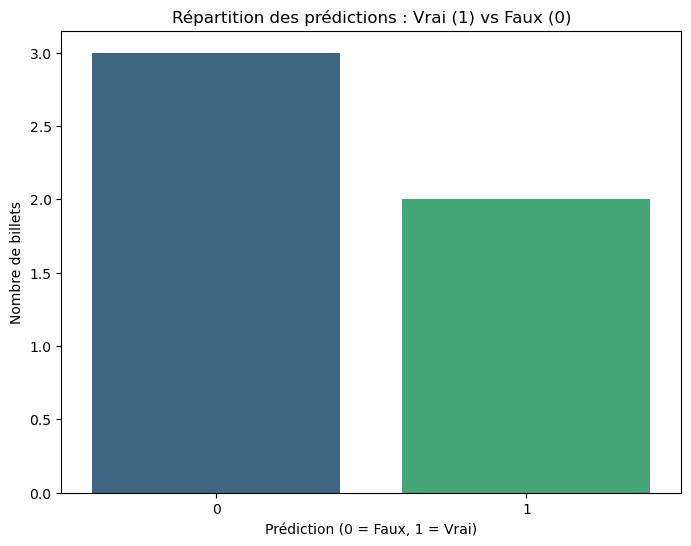

In [58]:
# Analyser un fichier de billets
df_billets, df_norm = analyser_billets('akounamata.csv')